## 課題１：特徴選択

まず yellowbrick の 再帰特徴削減(RFE) を走らせてみる．

再帰的特徴除去（RFE）は、モデルを適合させ、
指定された特徴数に達するまで最も弱い特徴（または特徴）を除去する特徴選択法です。
特徴はモデルのcoef_またはfeature_importances_属性によってランク付けされ、
ループごとに少数の特徴を再帰的に除去することで、
RFEはモデルに存在する可能性のある依存性と共線性を除去しようとします。

RFEでは、保持するために指定された数の特徴を必要としますが、
どれだけの特徴が有効であるかは事前にわからないことが多いです。
最適な特徴の数を見つけるために、RFEでクロスバリデーションを使用して、
異なる特徴のサブセットをスコア化し、最もスコア化された特徴の集合を選択します。
RFECV ビジュアライザーは、モデル内の特徴の数をクロスバリデーションされたテスト・スコアと
ばらつきとともにプロットし、選択された特徴の数を可視化します。

これが実際にどのように機能するかを示すために、
25個のうち情報量の多い特徴を3個しか持たないデータセットを使った例から始めます。

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


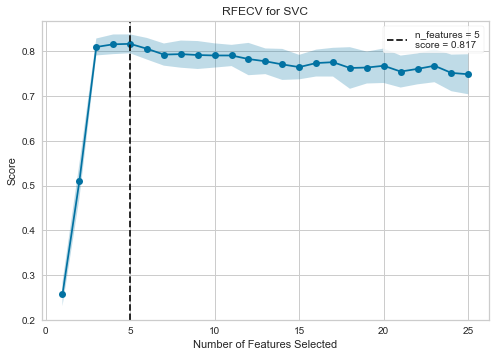

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.model_selection import RFECV

# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

この図は理想的なRFECV曲線を示しており、3つの情報的特徴が捕捉されると曲線は優れた精度にジャンプし、
その後、非情報的特徴がモデルに追加されると徐々に精度が低下します。
網掛けの領域は、クロスバリデーションの変動性を表し、
曲線によって描かれた平均精度スコアの上と下の1標準偏差を表しています。

実際のデータセットを探索すると、信用デフォルトのバイナリ分類器でのRFECVの影響を見ることができます。

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


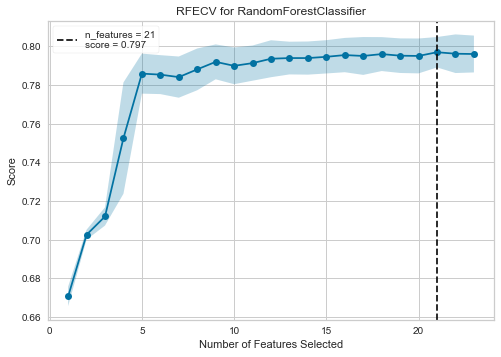

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit

# Load classification dataset
X, y = load_credit()

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

この例では、19個の特徴が選択されていることがわかりますが、
5個程度の特徴の後ではモデルのf1スコアはあまり改善されていないように見えます。
除去する特徴の選択は、各再帰の結果を決定する上で大きな役割を果たします。
各ステップで複数の特徴を除去するようにステップパラメータを変更すると、
最悪の特徴を早期に除去し、残りの特徴を強化するのに役立つかもしれません
（また、特徴の数が多いデータセットの特徴除去を高速化するために使用することもできます）。

### UCIのデータセットなど選んで再帰特徴削減(RFE) をやってみる

yellowbrick のデータセットにある occupancy データセットを取り出して実行

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


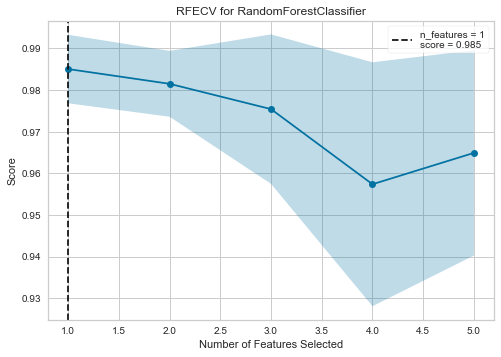

In [9]:
from yellowbrick.datasets import load_occupancy

X, y = load_occupancy()

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()    

## 課題２：検証曲線・学習曲線

まず yellowbrick の ’learning curve’ での例を走らせる．

学習曲線は、訓練サンプル数が変化する推定量について、訓練スコアと交差検証テストスコアの関係を示しています。
この可視化は通常、次の2つのことを示すために使用されます。

1. 推定量が増えることで推定量がどの程度恩恵を受けるか
（例：「十分なデータがある」か、オンラインで使用すると推定量が向上するかなど）。
1. 推定器が分散に起因する誤差とバイアスに起因する誤差のどちらに対してより敏感であるか。

以下の学習曲線を考えてみましょう
（Yellowbrickで生成されたものですが、scikit-learnドキュメントのPlotting Learning Curvesから生成されたものです）。

![](https://www.scikit-yb.org/en/latest/_images/learning_curve_sklearn_example.png)

より多くのデータが追加されるにつれて、学習スコアと交差検証スコアが一緒に収束する場合（左図に示す）、
モデルはおそらくより多くのデータの恩恵を受けないでしょう。
トレーニング・スコアが検証スコアよりもはるかに大きい場合、モデルはより効果的に一般化するために、
おそらくより多くのトレーニング例を必要とします。

曲線は平均スコアでプロットされていますが、クロス・バリデーション中の変動は、
すべてのクロス・バリデーションの平均の上と下の標準偏差を表す網掛けの領域で示されています。
モデルがバイアスのためにエラーを起こす場合、学習スコア曲線の周りには、おそらくより多くの変動があるでしょう。
モデルが分散のためにエラーを起こす場合、交差検証されたスコアの周囲には、より多くのばらつきがあるでしょう。

（注）学習曲線は、fit()メソッドとpredict()メソッド、および単一のスコアリングメトリックを持つすべての推定量について生成できます。
これには、以下の例で見るように、分類器、回帰器、およびクラスタリングが含まれます。

### Classification

次の例では、分類モデルの学習曲線を可視化する方法を示します。
DataFrameをロードし、カテゴリエンコーディングを実行した後、
各分割内のすべてのクラスが同じ比率で表現されることを保証するために、StratifiedKFoldクロスバリデーション戦略を作成します。
次に、分類器の精度とリコールの関係をよりよく理解するために、デフォルトのメトリックである精度ではなく、
f1_加重スコアリングメトリックを使用してビジュアライザーを適合させます。

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


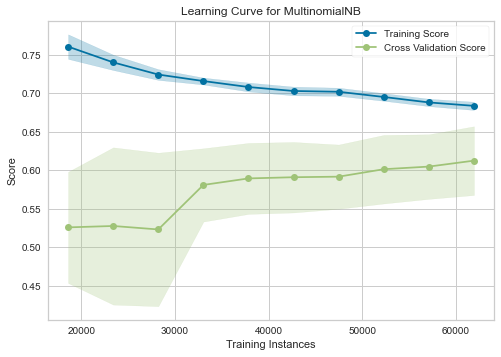

In [10]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Load a classification dataset
X, y = load_game()

# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

この学習曲線は、高いテスト変動性と約30,000インスタンスまでの低いスコアを示しますが、このレベルを超えると、
モデルは約0.6のF1スコアに収束し始めます。
訓練とテストのスコアがまだ収束していないことがわかりますので、
このモデルは潜在的にはより多くの訓練データの恩恵を受けるでしょう。

最後に、このモデルは主に分散（テスト・データのCVスコアはトレーニング・データよりも変動が大きい）による誤差に苦しんでいるので、モデルがオーバーフィットしている可能性があります。

### Regression

回帰の学習曲線を構築することは、直線的で非常に似ています。
下の例では、データをロードしてターゲットを選択した後、決定係数またはR2スコアに従って学習曲線スコアを探索します。

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


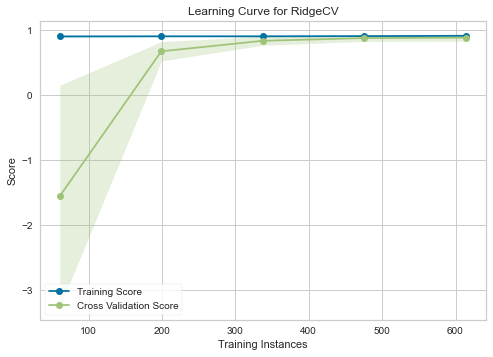

In [11]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
X, y = load_energy()

# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

この学習曲線は非常に高い変動性を示し、約350個のインスタンスまではかなり低いスコアを示しています。
非常に高いスコアで収束しているので、このモデルがより多くのデータの恩恵を受けられることは明らかです。
潜在的に、より多くのデータと正則化のためのより大きなアルファがあれば、
このモデルはテスト・データでの変動がはるかに少なくなるでしょう。

### Clustering

学習曲線はクラスタリングモデルにも機能し、
シルエットスコアや密度スコアのようなクラスタの形状や組織を指定するメトリクスを使用することができます。
メンバーシップが事前に分かっている場合は、
以下のようにランドスコアを使用してクラスタリング性能を比較することができます。

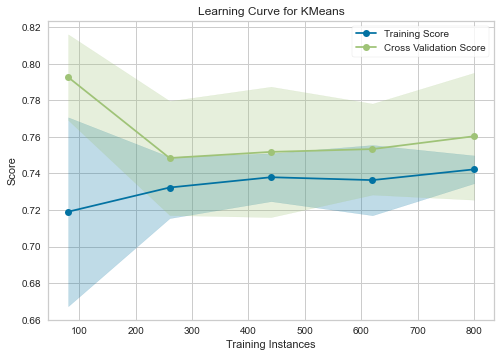

In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.model_selection import LearningCurve

# Generate synthetic dataset with 5 random clusters
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = LearningCurve(model, scoring="adjusted_rand_score", random_state=42)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

残念ながら、ランダムデータでは、これらの曲線は非常に変動しますが、クラスタリングに特有の項目を指摘するのに役立ちます。
第一に、y軸が非常に狭いことに注意してください。
大まかに言えば、これらの曲線は収束しており、実際にはクラスタリングアルゴリズムが非常にうまく機能しています。
第二に、クラスタリングにおいて、データポイントの収束は必ずしも悪いことではありません；
実際、我々はより多くのデータが追加されても、トレーニングスコアとクロスバリデーションスコアが発散しないようにしたいと考えています。

### Quick Method

同じ機能は、関連するクイックメソッド `learning_curve` で実現できます。
このメソッドは、関連付けられた引数で `LearningCurve` オブジェクトを構築し、
それをフィットさせてから (オプションで) すぐに可視化を表示します。

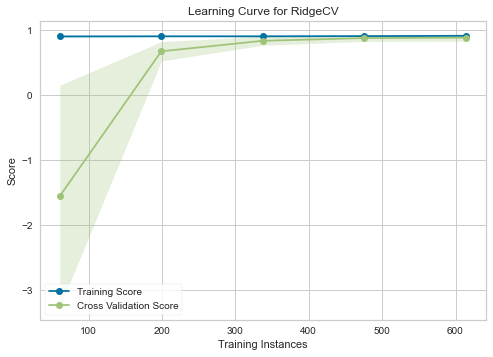

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C9AA611D0>,
              model=None, scoring='r2')

In [13]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import learning_curve

# Load a regression dataset
X, y = load_energy()

learning_curve(RidgeCV(), X, y, scoring='r2')

### UCIの他のデータセットから選んで学習曲線を見てみる

Concrete を使用して Regression で学習曲線を見る

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


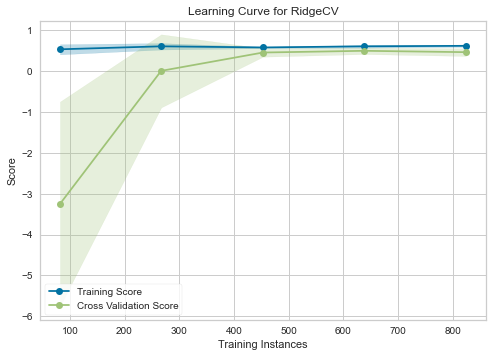

In [16]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
X, y = load_concrete()

# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


energy と同様にうまく学習がすすんでいる．
